<a href="https://colab.research.google.com/github/vishivish18/handson-ml-v3/blob/main/02_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [13]:
def load_housing_data():
  tarball_path = Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True,exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url,tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path='datasets')
  return pd.read_csv('datasets/housing/housing.csv')

In [15]:
housing = load_housing_data()

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
import matplotlib.pyplot as plt

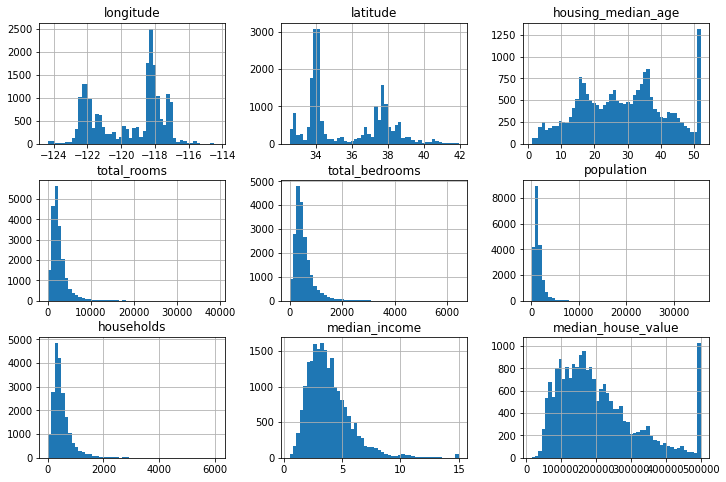

In [22]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [23]:
import numpy as np

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

<AxesSubplot:>

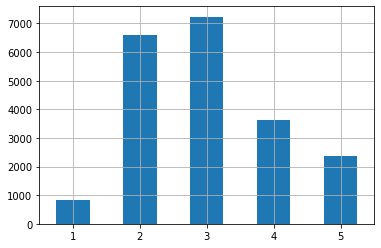

In [39]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)

In [40]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.20, stratify=housing['income_cat'], random_state=42)

In [48]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [49]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [50]:
for set in (strat_train_set, strat_test_set):
  set.drop('income_cat',axis=1, inplace=True)

In [52]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

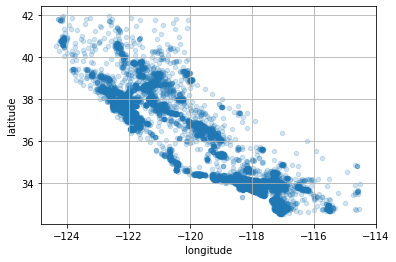

In [55]:
housing.plot(kind='scatter',x='longitude',y='latitude', grid=True, alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

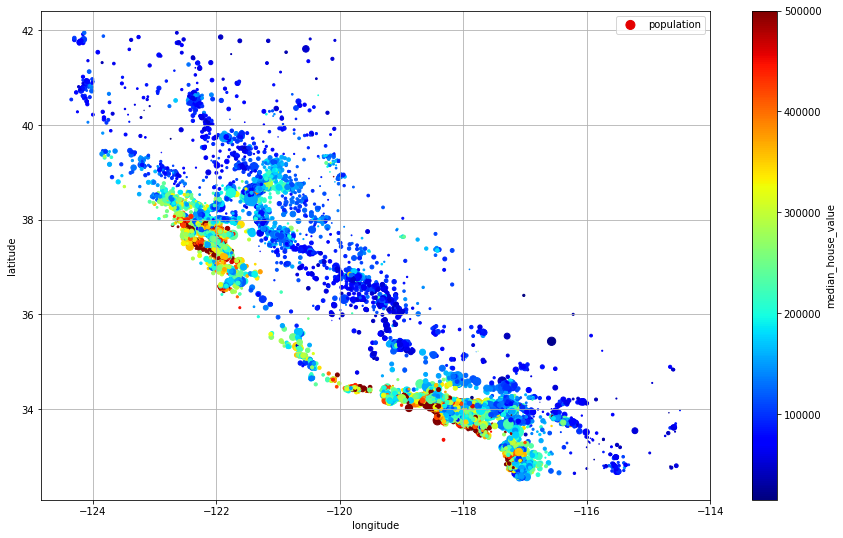

In [56]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,s=housing['population']/100, label='population', c='median_house_value',
             cmap= 'jet',colorbar=True,legend=True,sharex=False, figsize=(15,9))

In [57]:
corr_matrix = housing.corr()

In [59]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [60]:
from pandas.plotting import scatter_matrix

In [61]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

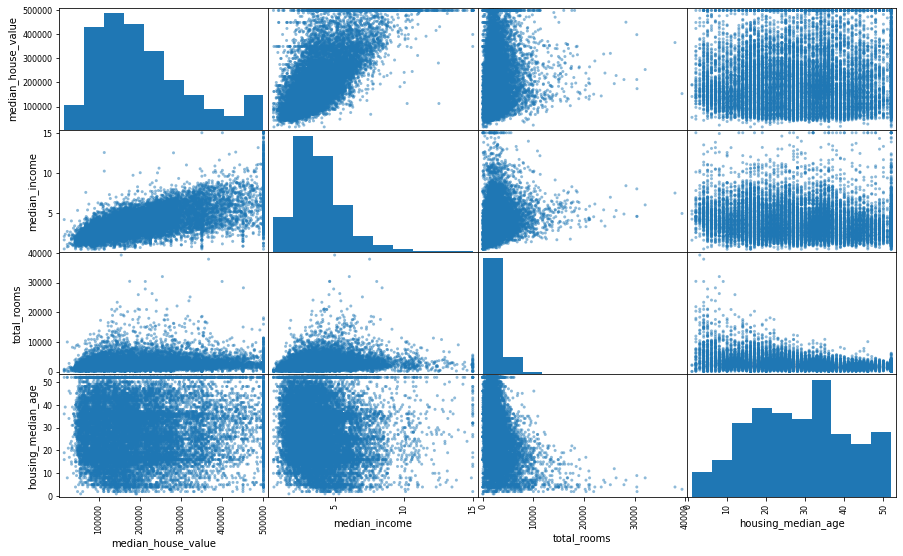

In [62]:
scatter_matrix(housing[attributes], figsize=(15,9))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

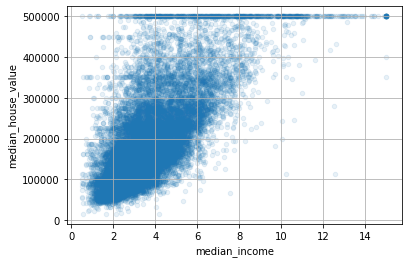

In [63]:
housing.plot(kind="scatter",x="median_income",y="median_house_value", alpha=0.1,grid=True)

In [65]:
housing["rooms_per_house"]= housing["total_bedrooms"]/housing["households"]

In [66]:
housing["bedroom_ratio"]= housing["total_bedrooms"]/housing["total_rooms"]

In [67]:
housing["people_per_house"]= housing["population"]/housing["households"]

In [68]:
corr_matrix=housing.corr()

In [70]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
rooms_per_house      -0.045545
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

In [71]:
housing = strat_train_set.drop("median_house_value",axis=1)

In [74]:
housing_labels = strat_train_set["median_house_value"].copy()

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imputer = SimpleImputer(strategy="median")

In [77]:
housing_num = housing.select_dtypes(include=[np.number])

In [79]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [80]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [81]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [82]:
X = imputer.transform(housing_num)